## Predicción del precio medio del aguacate usando técnicas de modelado de series temporales.

### Tabla de contenidos:
- [Importacion de librerias y otro codigo util](#importacion-de-librerias-y-otro-codigo-util)
- [Analisis exploratorio de los datos](#analisis-exploratorio-de-los-datos)
    - [Lectura y carga del dataset](#lectura-y-carga-del-dataset)
    - [Visualizacion de las variables](#visualizacion-de-las-variables)
    - [Visualizacion de la serie temporal](#visualizacion-de-la-serie-temporal)
- [Aplicamos **ARIMA**](#aplicamos-arima)
    - [¿Tiene tendencia o es estacionaria? --> Parametro ``d``](#tiene-tendencia-o-es-estacionaria----parametro-d)
    - [Modelizacion y ajuste con **auto_arima**](#modelizacion-y-ajuste-con-auto_arima)
    - [Visualizacion del modelo entrenado](#visualizacion-del-modelo-entrenado)
    - [Visualizacion de las predicciones](#visualizacion-de-las-predicciones)
    - [Predicciones](#predicciones)
- [Aplicamos **Prophet**](#aplicamos-prophet)
    - [Filtramos dataframe](#filtramos-dataframe)
    - [Renombramos columnas y cambiamos formato de fechas](#renombramos-columnas-y-cambiamos-formato-de-fechas)
    - [Entrenamos modelo Prophet](#entrenamos-modelo-prophet)
    - [Realizamos predicciones](#realizamos-predicciones)
    - [Visualizamos las predicciones](#visualizamos-las-predicciones)
    - [Prediccion para una region concreta: Las Vegas](#prediccion-para-una-region-concreta-las-vegas)

DESCRIPCIÓN DE LAS VARIABLES:

- ``Date`` :The date of the observation

- ``AveragePrice`` : the average price of a single avocado

- ``Total Volume`` : Total number of avocados sold

- ``4046`` : Total number of avocados with PLU 4046 sold

- ``4225`` : Total number of avocados with PLU 4225 sold

- ``4770`` : Total number of avocados with PLU 4770 sold

- ``Total Bags`` : Total number of bags

- ``Small Bags`` : Total number of small bags

- ``Large Bags`` : Total number of large bags

- ``XLarge Bags`` : Extra Large Bags

- ``type`` : conventional or organic

- ``year`` : year of the date

- ``region`` : the city or region of the observation

### Importacion de librerias y otro codigo util

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ARIMA
from statsmodels.tsa.stattools import adfuller 
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Prophet
from prophet import Prophet

In [3]:
green_palette = sns.color_palette('Greens')

### Analisis exploratorio de los datos

#### Lectura y carga del dataset

In [4]:
avocado = pd.read_csv(r'./data/avocado.csv')
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
avocado.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
avocado['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [7]:
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [9]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [6]:
# Eliminar 'TotalUS' de la columna 'region' para que no falsee los resultados
avocado = avocado[avocado['region'] != 'TotalUS']

In [32]:
# visualizacion de los valores nulos
avocado.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
# visualizacion de los valores duplicados
avocado.duplicated().sum()

0

#### Visualizacion de las variables

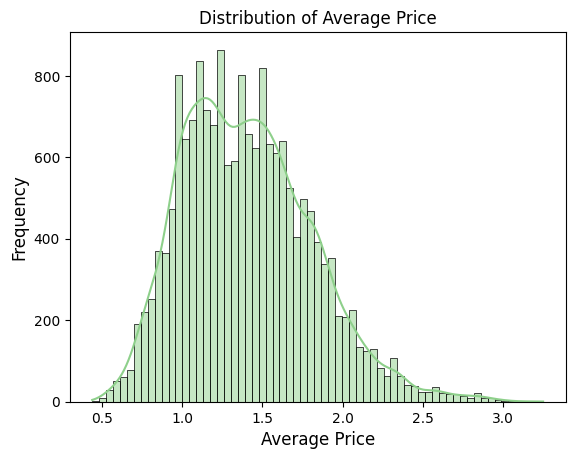

In [33]:
#Visualizo la distribución de la variable 'AveragePrice'

sns.histplot(avocado['AveragePrice'], kde=True, color=green_palette[2])
plt.title('Distribution of Average Price', fontsize=12)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12);

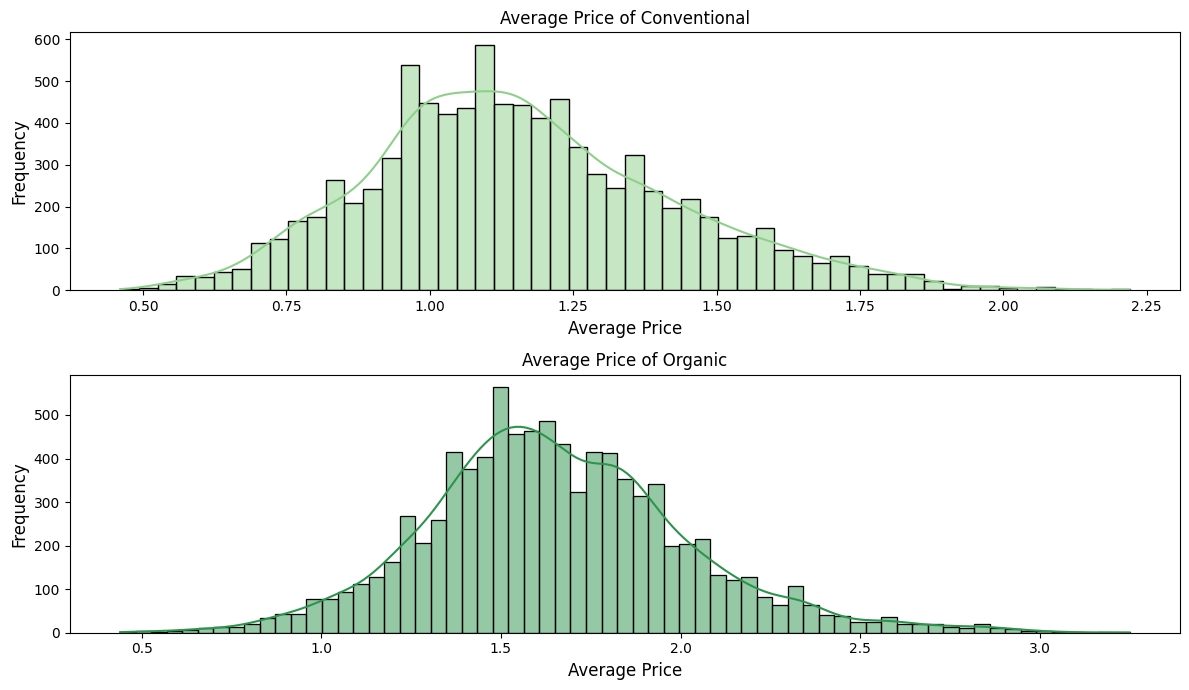

In [8]:
#Visualizo la distribución de la variable 'AveragePrice' por cada tipo de aguacate

avocado_conv = avocado[avocado["type"] == "conventional"]
avocado_org = avocado[avocado["type"] == "organic"]

# Crear figura y ejes para los subplots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 7))
# Histograma para 'conventional'
sns.histplot(avocado_conv['AveragePrice'], kde=True, color=green_palette[2], ax=ax1)
ax1.set_title('Average Price of Conventional', fontsize=12)
ax1.set_xlabel('Average Price', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
# Histograma para 'organic'
sns.histplot(avocado_org['AveragePrice'], kde=True, color=green_palette[4], ax=ax2)
ax2.set_title('Average Price of Organic', fontsize=12)
ax2.set_xlabel('Average Price', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
# Ajustar el espacio entre subplots
plt.tight_layout()
# Mostrar la figura
plt.show()

C:\Users\kina5\AppData\Local\Temp\ipykernel_18440\1709994373.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x="type", y="AveragePrice",data=avocado, hue='type', palette=green_palette)


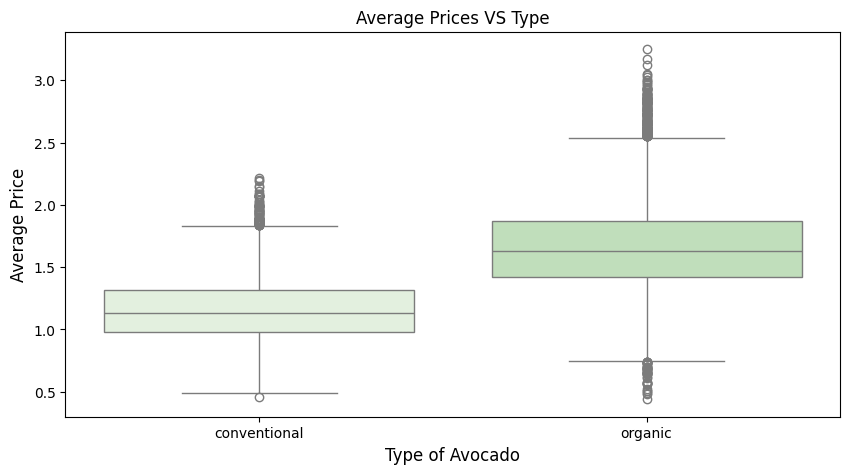

In [35]:
# comparacion de los precios por tipo de aguacate
f,ax = plt.subplots(figsize = (10,5))
sns.boxplot(x="type", y="AveragePrice",data=avocado, hue='type', palette=green_palette)
plt.title("Average Prices VS Type",fontsize = 12)
plt.xlabel('Type of Avocado',fontsize = 12)
plt.ylabel('Average Price',fontsize = 12);

#### Visualizacion de la serie temporal

In [9]:
# Nos aseguramos de que la columna 'Date' esté en formato datetime
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado_conv['Date'] = pd.to_datetime(avocado['Date'])
avocado_org['Date'] = pd.to_datetime(avocado['Date'])

C:\Users\kina5\AppData\Local\Temp\ipykernel_29076\3565285032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_conv['Date'] = pd.to_datetime(avocado['Date'])
C:\Users\kina5\AppData\Local\Temp\ipykernel_29076\3565285032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avocado_org['Date'] = pd.to_datetime(avocado['Date'])


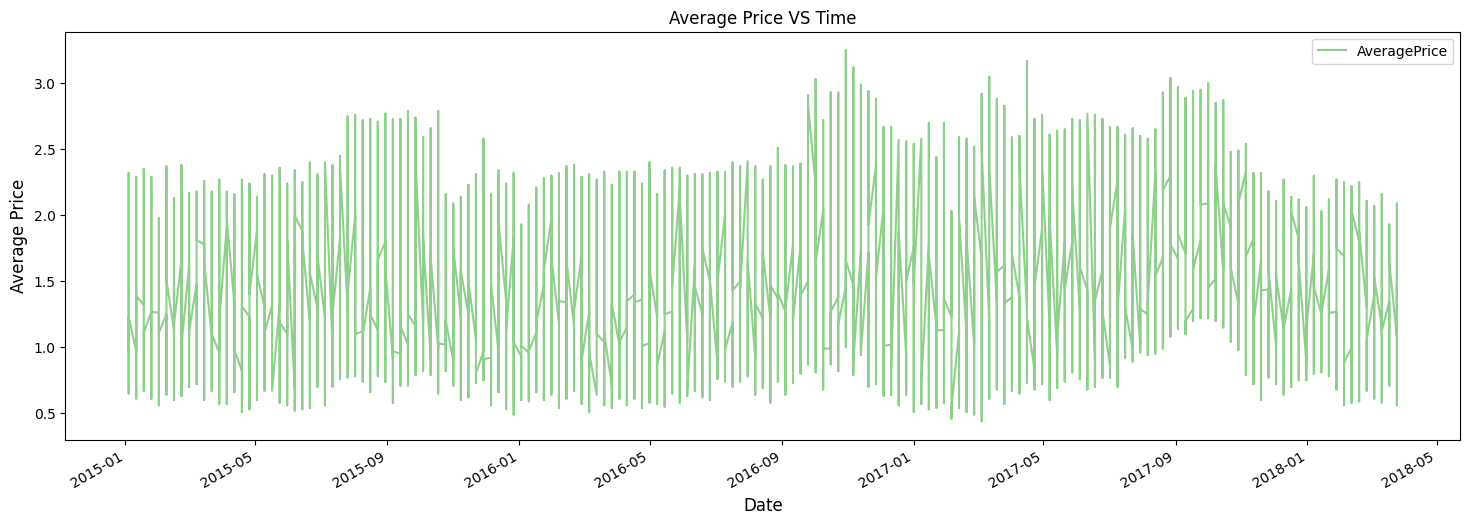

In [37]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
avocado.set_index('Date').plot(y='AveragePrice', ax=ax, color=green_palette[2])
plt.title('Average Price VS Time', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12);

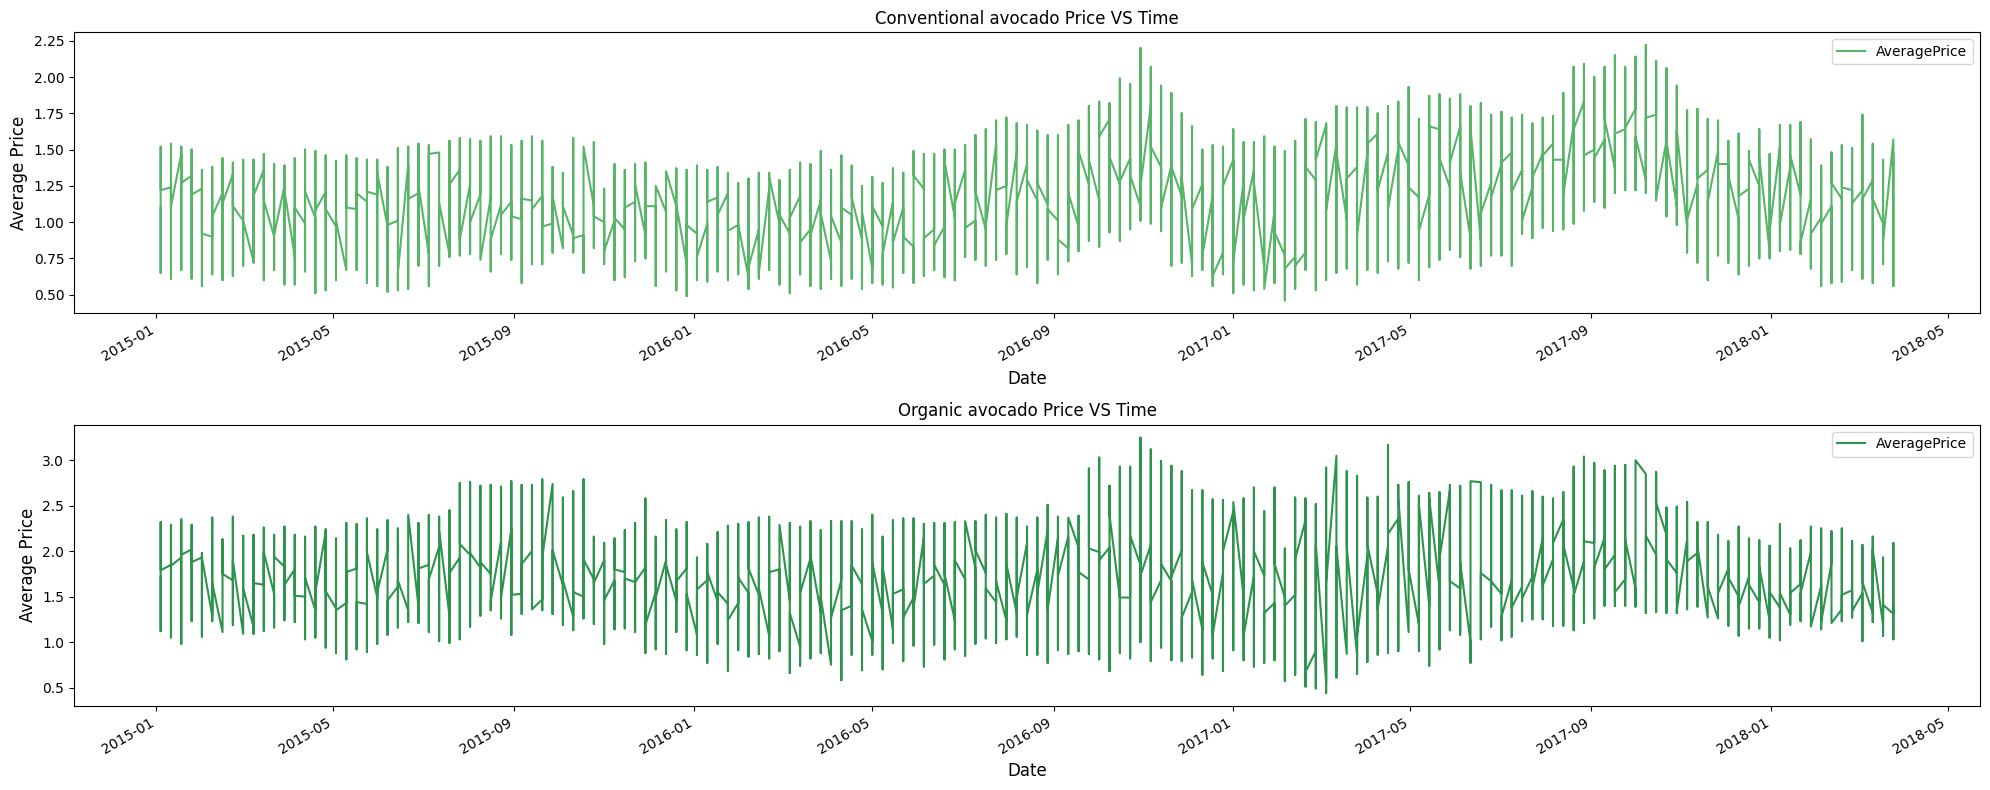

In [38]:
# visualizacion de la serie temporal por cada tipo de aguacate

# Crear figura y ejes para los subplots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))
# Serie temporal para 'conventional'
avocado_conv.set_index('Date').plot(y='AveragePrice', ax=ax1, color=green_palette[3])
ax1.set_title('Conventional avocado Price VS Time', fontsize=12)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Average Price', fontsize=12)
# Serie temporal para 'organic'
avocado_org.set_index('Date').plot(y='AveragePrice', ax=ax2, color=green_palette[4])
ax2.set_title('Organic avocado Price VS Time', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Average Price', fontsize=12)
# Ajustar el espacio entre subplots
plt.tight_layout()
# Mostrar la figura
plt.show()

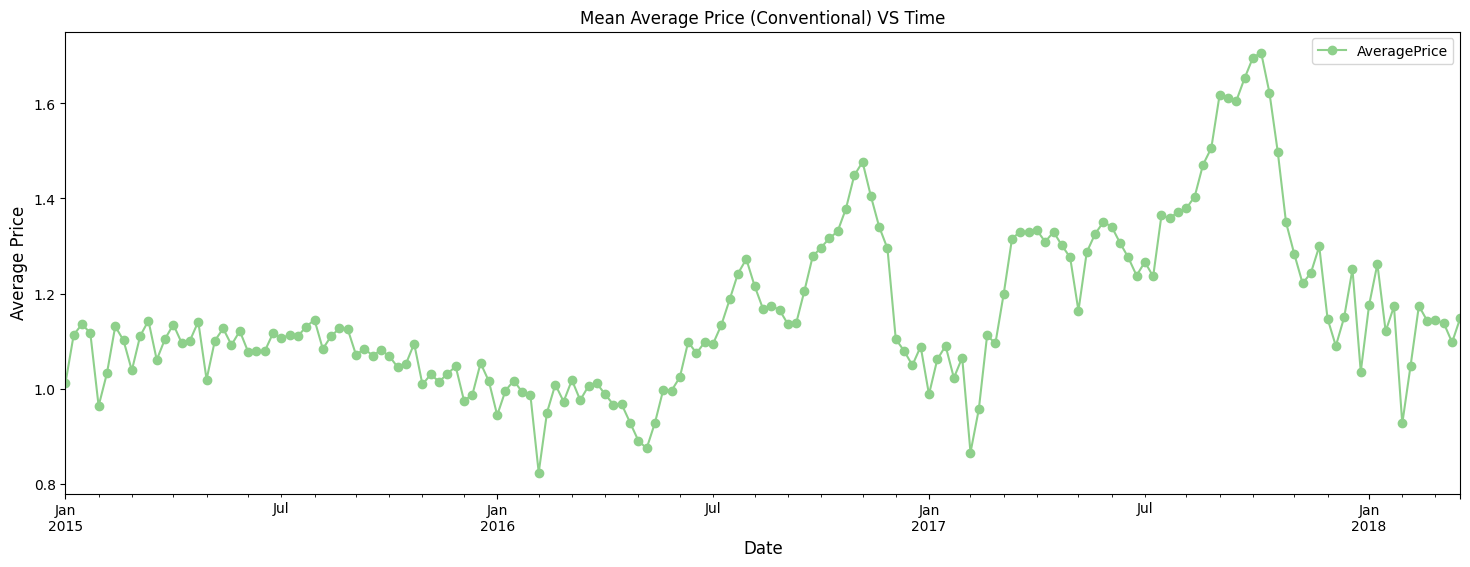

In [39]:
# promedio de 'AveragePrice' para cada fecha: Conventional avocado
fig, ax = plt.subplots(1,1, figsize=(18,6))
avocado_conv.groupby('Date')['AveragePrice'].mean().reset_index().set_index('Date').plot(ax=ax, marker = 'o', linestyle = '-', color = green_palette[2])
plt.title('Mean Average Price (Conventional) VS Time', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12);

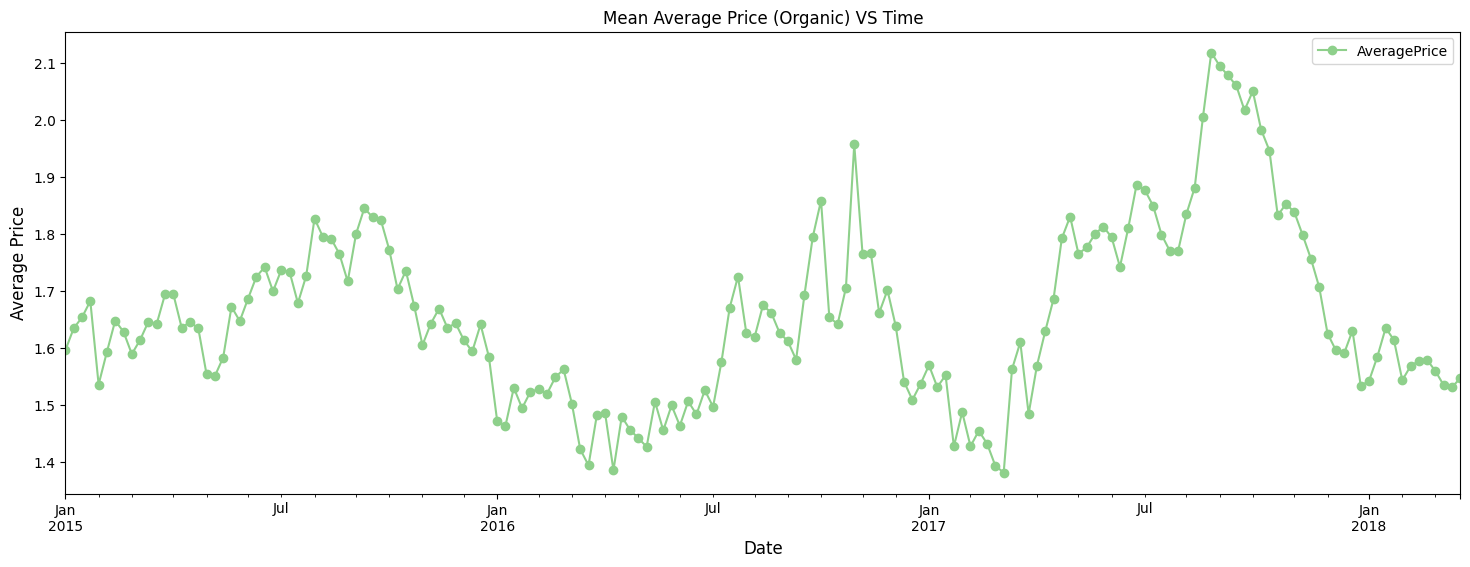

In [40]:
# promedio de 'AveragePrice' para cada fecha: Organic avocado
fig, ax = plt.subplots(1,1, figsize=(18,6))
avocado_org.groupby('Date')['AveragePrice'].mean().reset_index().set_index('Date').plot(ax=ax, marker = 'o', linestyle = '-', color = green_palette[2])
plt.title('Mean Average Price (Organic) VS Time', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12);

OBSERVACIONES

- Los precios son mayores de julio a septiembre-octubre.
- En 2018 los precios fueron mayores que en los años anteriores.

---
### Aplicamos **ARIMA**

Tenemos que establecer los valores p, d, q:

- Parámetro p - AUTORREGRESIVO (**AR**): es el orden del componente autorregresivo del modelo. Representa el número de rezagos (lags) de la serie temporal que se usan en el modelo.
- Parámetro d - DIFERENCIACIÓN (**I**): es el número de veces que se debe diferenciar la serie temporal para que se vuelva estacionaria. 
- Parámetro q - MEDIA MÓVIL (**MA**): Representa el número de rezagos (lags) de los errores de predicción que se usan en el modelo.

**PASOS A SEGUIR**:

#### Filtrar y separar dataframe

Vamos a quedarnos solo con las columnas ``Date`` y ``AveragePrice``:

In [48]:
col = ['Date', 'AveragePrice']
avocado_ARIMA = avocado[col].copy()

In [49]:
# Convertir a índice de fecha si no lo es
if not pd.api.types.is_datetime64_any_dtype(avocado_ARIMA['Date']):
    avocado_ARIMA['Date'] = pd.to_datetime(avocado_ARIMA['Date'])

avocado_ARIMA.set_index('Date', inplace=True)

#### ¿Tiene tendencia o es estacionaria? --> Parametro ``d``

In [50]:
# Aplicamos adfuller para establecer el parámetro
print(f"p-valor diferenciación orden cero: {adfuller(avocado_ARIMA['AveragePrice'])[1]}") # devuelve un estadistico y un pvalor, y queremos el pvalor[1]
print(f"p-valor diferenciación orden uno: {adfuller(avocado_ARIMA['AveragePrice'].diff().dropna())[1]}")
print(f"p-valor diferenciación orden dos: {adfuller(avocado_ARIMA['AveragePrice'].diff().diff().dropna())[1]}")

p-valor diferenciación orden cero: 1.4965877538772598e-11
p-valor diferenciación orden uno: 0.0
p-valor diferenciación orden dos: 0.0


Todos son menores de 0.05, por lo que consideramos la serie **estacionaria**.

De aquellos pvalor que pasan el 0.05, me quedo con el que tenga menos diferenciación: La diferenciación de orden 0 (sin diferenciar).

Por lo tanto, ``d=0``.

#### Modelizacion y ajuste con **auto_arima**

Para el cálculo de los parámetros ``p`` y ``q``, aplicamos auto_arima:

In [25]:
# aplicamos modelado con auto_arima
model = auto_arima(avocado_ARIMA['AveragePrice'], start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=52,            # Ciclo estacional semanal, m=52 semanas por año
                      d=0,          
                      seasonal=True,  # Activar estacionalidad
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=-13419.735, Time=41.02 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=18387.718, Time=2.75 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-12013.963, Time=39.92 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1861.101, Time=14.71 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=64498.169, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-13421.733, Time=10.57 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-13419.735, Time=42.10 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=74.29 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4949.087, Time=3.47 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-12005.493, Time=1.05 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=-13500.122, Time=13.26 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=-12691.402, Time=51.67 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=-13498.521, Time=32.85 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=69.48 sec
 

Vamos a tomar finalmente modelo $\text{ARIMA}(p=3,\,d=0,\,q=3)$.

In [51]:
# Instanciamos el modelo ARIMA
model = ARIMA(avocado_ARIMA['AveragePrice'].values, order=(3,0,3))
# entrenamos modelo
model_fit = model.fit()
# Resumen del entrenamiento
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                17911
Model:                 ARIMA(3, 0, 3)   Log Likelihood                6781.007
Date:                Tue, 27 Aug 2024   AIC                         -13546.013
Time:                        11:07:42   BIC                         -13483.668
Sample:                             0   HQIC                        -13525.506
                              - 17911                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4079      0.023     61.368      0.000       1.363       1.453
ar.L1         -0.0553      0.052     -1.055      0.292      -0.158       0.047
ar.L2          0.5786      0.048     12.159      0.0

#### Visualizacion del modelo entrenado

`plot_diagnostics` nos muestra (de izquierda a derecha y de arriba hacia abajo) la gráfica real del ruido, el histograma real y estimado, el gráfico de cuantiles y un correlograma:

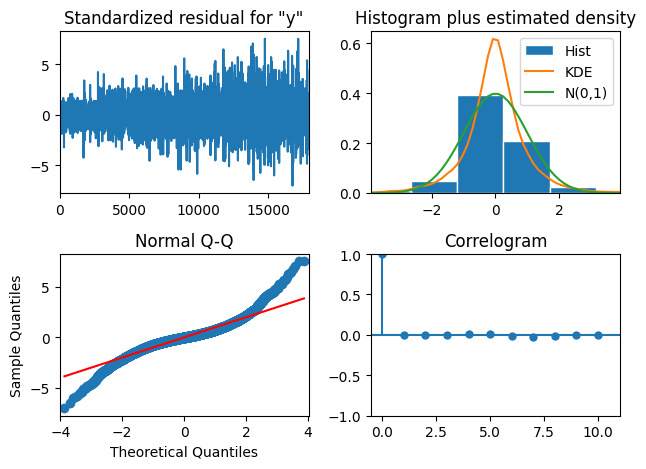

In [52]:
model_fit.plot_diagnostics()
plt.tight_layout()
plt.show()

#### Visualizacion de las predicciones

Para comprobar la calidad del ajuste del modelo entrenado a los datos de la serie temporal proporcionados, podemos usar el método `predict` del modelo ARIMA entrenado para trazar los valores reales y pronosticados uno encima del otro. Este gráfico lineal se calcula a partir de los pesos aprendidos y entrenados por el modelo. Verifiquemos qué tan bien funciona la predicción en función de los coeficientes aprendidos:

In [53]:
# Tomamos predicciones
predictions = model_fit.predict() # NOTA: predict predice solo dentro del rango de fechas del conjunto de datos a menos que se especifique un rango de fechas futuro

In [54]:
# creamos una nueva columna en el df con las predicciones
avocado_ARIMA['predictions'] = predictions

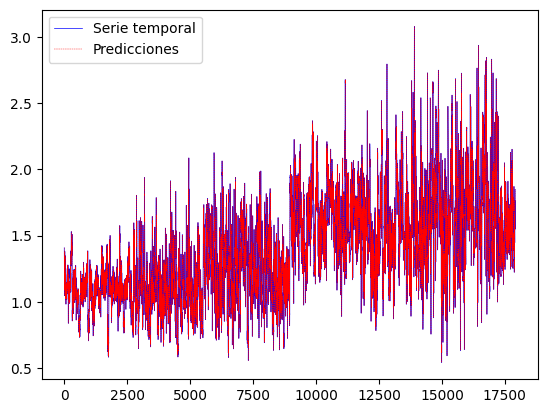

In [55]:
p = 3 # Coeficientes de autoregresión
d = 0 # Orden de diferenciación
q = 3 # Ajuste media móvil

# Creamos figura
fig, ax = plt.subplots()
ax.plot(range(len(avocado_ARIMA)), avocado_ARIMA['predictions'].values, 'b-',linewidth=0.5)
ax.plot(range(d,len(avocado_ARIMA)), predictions[d:], 'r--', linewidth=0.3)
plt.legend(['Serie temporal', 'Predicciones'])
plt.show()

In [56]:
avocado_ARIMA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17911 entries, 2015-12-27 to 2018-01-07
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17911 non-null  float64
 1   predictions   17911 non-null  float64
dtypes: float64(2)
memory usage: 419.8 KB


Calculamos métricas para evaluar el rendimiento del modelo de predicción: **Error Cuadrático Medio (MSE) y Raíz del Error Cuadrático Medio (RMSE)**.

In [58]:
# MSE mide el promedio de los errores al cuadrado entre los valores reales y los predichos
print("\tMean Squared Error:", mean_squared_error(avocado_ARIMA['AveragePrice'], avocado_ARIMA['predictions']))
# RMSE es la raíz cuadrada del MSE. El RMSE es más interpretativo porque está en las mismas unidades que el AveragePrice de los aguacates.
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(avocado_ARIMA['AveragePrice'],
avocado_ARIMA['predictions'])))

	Mean Squared Error: 0.02745648101815912
	Root Mean Squared Error: 0.1656999728972794


Un MSE más bajo indica un mejor rendimiento del modelo, ya que significa que las predicciones están más cerca de los valores reales. Un RMSE más bajo también indica un mejor rendimiento del modelo, ya que significa que, en promedio, las predicciones están más cerca de los valores reales.

Un RMSE de 0.166 sugiere que, en promedio, las predicciones del modelo difieren de los valores reales en alrededor de 0.166 unidades (dólares o centavos, dependiendo de la variable AveragePrice).

#### Predicciones

In [59]:
# Hacemos predicciones futuras
model_fit.forecast() # Al día siguiente, va a haber ese precio medio
model_fit.forecast(2) # En los siguientes 2 días

array([1.67501243, 1.68583001])

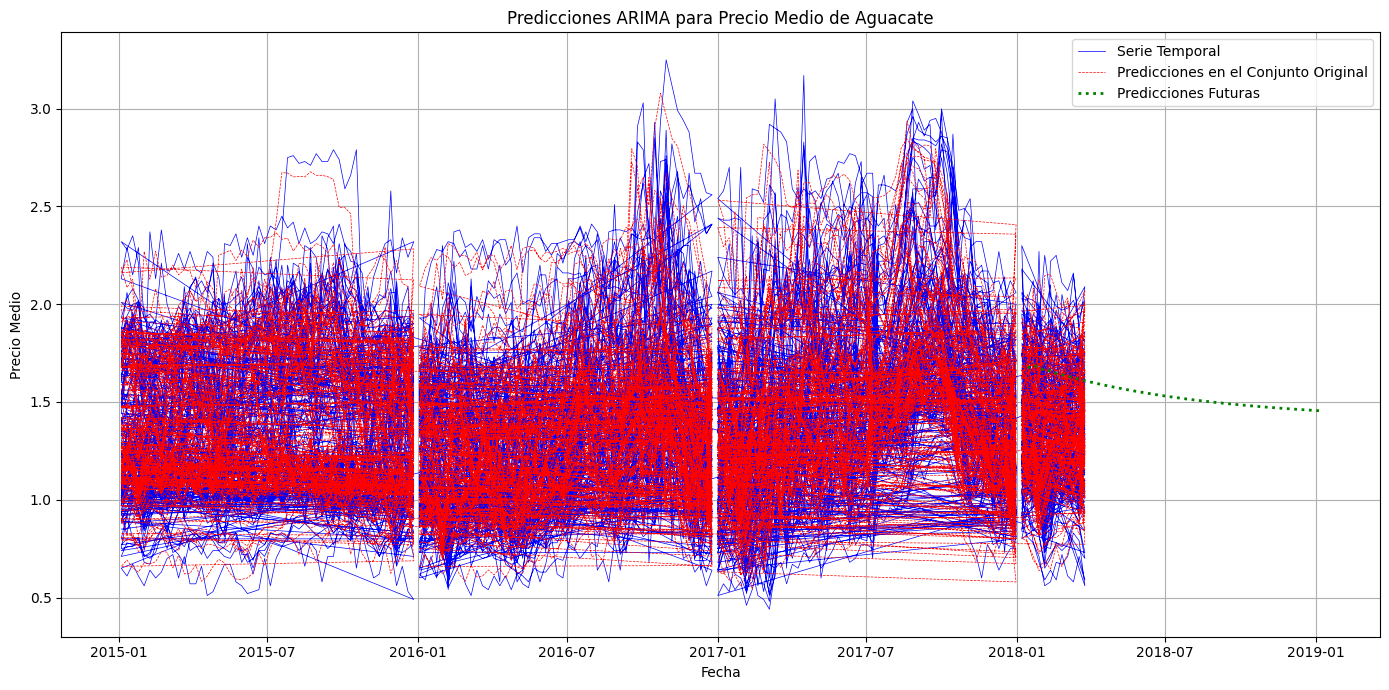

In [62]:
forecast_steps = 52  # Número de pasos a futuro en semanas
forecast = model_fit.forecast(steps=forecast_steps)

# Crear un rango de fechas para las predicciones futuras
last_date = avocado_ARIMA.index[-1]
# Crear fechas futuras con frecuencia semanal
future_dates = pd.date_range(start=last_date + pd.DateOffset(weeks=1), periods=forecast_steps, freq='W')

# Crear DataFrame para las predicciones futuras
forecast_df = pd.DataFrame(forecast, index=future_dates, columns=['Forecast'])

# Crear figura
fig, ax = plt.subplots(figsize=(14, 7))

# Graficar datos originales
ax.plot(avocado_ARIMA.index, avocado_ARIMA['AveragePrice'], label='Serie Temporal', color='b', linewidth=0.5)

# Graficar predicciones en el conjunto de datos original
ax.plot(avocado_ARIMA.index, predictions, label='Predicciones en el Conjunto Original', linestyle='--', color='r', linewidth=0.5)

# Graficar predicciones futuras
ax.plot(forecast_df.index, forecast_df['Forecast'], label='Predicciones Futuras', linestyle=':', color='g', linewidth=2)

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Precio Medio')
plt.title('Predicciones ARIMA para Precio Medio de Aguacate')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

### Aplicamos **Prophet**

Prophet es una biblioteca de software para modelar y realizar previsiones en series temporales, desarrollada por Facebook. Prophet funciona mejor con series temporales que tienen efectos estacionales fuertes y varios años de datos históricos.

In [61]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Filtramos dataframe

Vamos a quedarnos solo con las columnas ``Date`` y ``AveragePrice``:

In [62]:
avocado_prophet = avocado[col].copy()

#### Renombramos columnas y cambiamos formato de fechas

In [63]:
# Renombramos columnas (deben llamarse exactamente así)
avocado_prophet.rename(columns = {'Date':'ds', 'AveragePrice':'y'}, inplace = True)
# Cambiamos formato a fechas
avocado_prophet['ds'] = pd.DatetimeIndex(avocado_prophet['ds'])
# Mostramos
avocado_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      18249 non-null  datetime64[ns]
 1   y       18249 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 285.3 KB


In [64]:
avocado_prophet.head()

,ds,y
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28


#### Entrenamos modelo Prophet

In [66]:
# Instanciamos clase
m = Prophet()
# Entrenamos modelo
m.fit(avocado_prophet)

13:08:41 - cmdstanpy - INFO - Chain [1] start processing
13:08:48 - cmdstanpy - INFO - Chain [1] done processing


#### Realizamos predicciones

In [67]:
future =  m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [68]:
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [69]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.080679,0.546782,1.576560
530,2019-03-22,1.081751,0.571135,1.593971
531,2019-03-23,1.083100,0.566270,1.583022
532,2019-03-24,1.084708,0.509126,1.602538
533,2019-03-25,1.086547,0.556343,1.596683


#### Visualizamos las predicciones

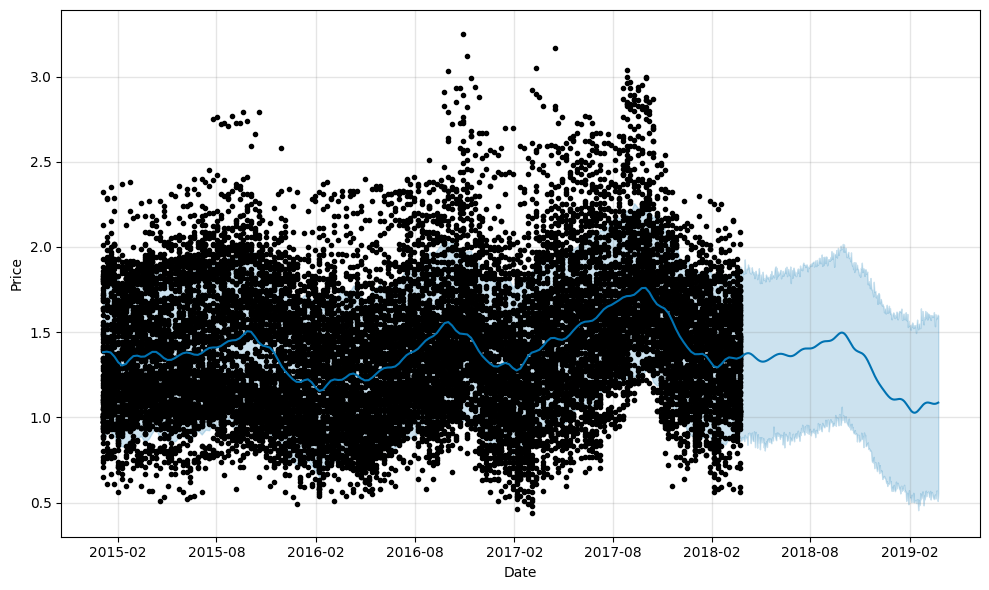

In [73]:
# prediccion para 1 año
fig1 = m.plot(forecast, xlabel ='Date', ylabel = 'Price')

COMPONENTES DEL GRÁFICO:

- **Línea azul oscura**: Representa la tendencia esperada para el precio en la serie temporal, realizada por el modelo Prophet.
- **Sombra azul**: Representa el intervalo de confianza (por defecto es el 80%) alrededor de la predicción central, es decir, refleja la incertidumbre en la predicción.
- **Puntos negros**: Representan los datos históricos observados.

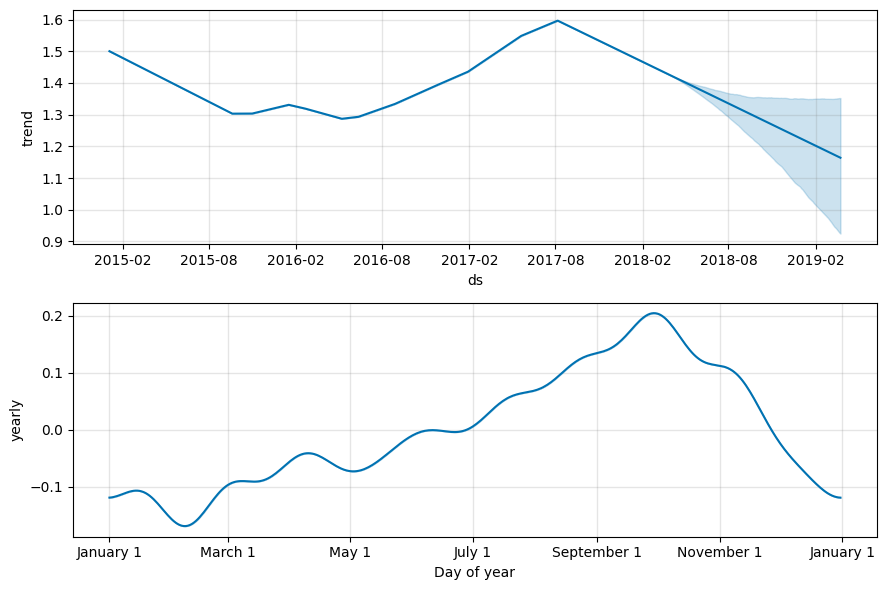

In [77]:
fig2 = m.plot_components(forecast)

COMPONENTES DEL GRÁFICO: 

1. El primer gráfico muestra la tendencia a largo plazo (*trend*) del precio en la serie temporal. Indica si la variable predicha (precio) está aumentando, disminuyendo o manteniéndose estable a lo largo del tiempo. **En este caso, parece que la tendencia disminuye en la predicción para un año**.

2. El segundo gráfico muestra la variación del precio a lo largo de un año (*yearly*). Este componente te permite ver cómo los valores predichos fluctúan dentro de un año, reflejando estacionalidades anuales. **En este caso, podemos ver que el precio de los aguacates alcanza un pico en el mes de octubre**.

#### Prediccion para una region concreta: Las Vegas

In [82]:
avocado['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [81]:
avocado_lasvegas = avocado[avocado['region']=='LasVegas']

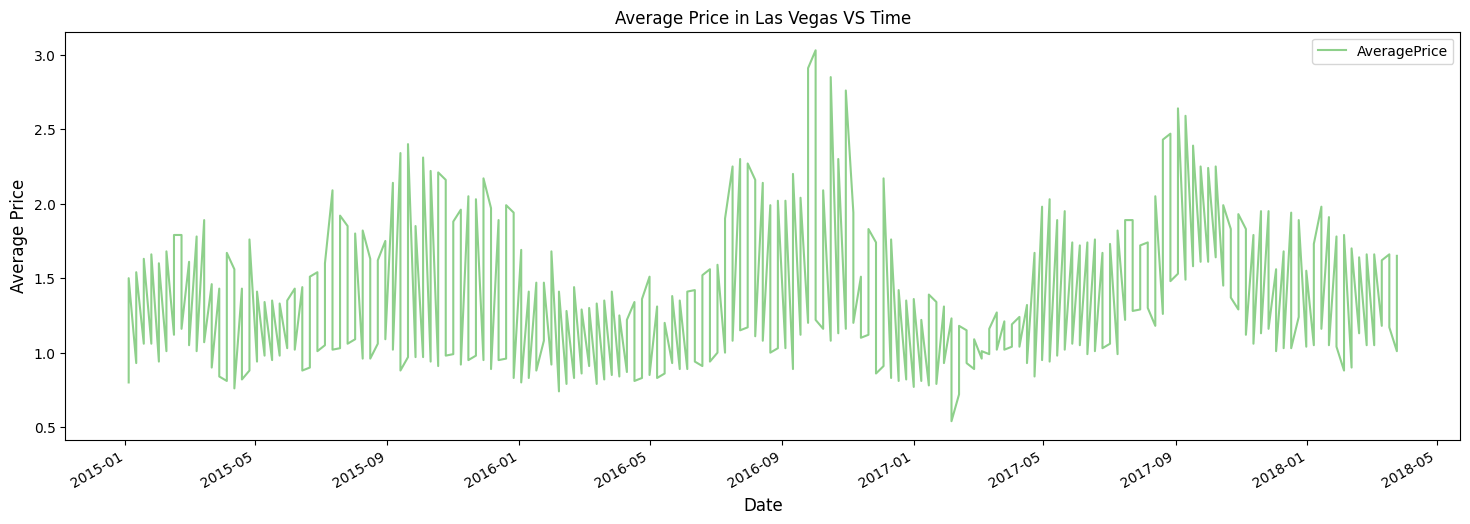

In [83]:
# graficamos la serie temporal del precio de los aguacates en las vegas
fig, ax = plt.subplots(1,1, figsize=(18,6))
avocado_lasvegas.set_index('Date').plot(y='AveragePrice', ax=ax, color=green_palette[2])
plt.title('Average Price in Las Vegas VS Time', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Price', fontsize=12);

In [85]:
# filtramos el dataframe y nos quedamos con las columnas Date y AveragePrice
avocado_lasvegas_prophet = avocado_lasvegas[col].copy()

In [86]:
# Renombramos columnas y cambiamos formato de fechas
avocado_lasvegas_prophet.rename(columns = {'Date':'ds', 'AveragePrice':'y'}, inplace = True)
avocado_lasvegas_prophet['ds'] = pd.DatetimeIndex(avocado_lasvegas_prophet['ds'])
# Mostramos
avocado_lasvegas_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 1092 to 17864
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      338 non-null    datetime64[ns]
 1   y       338 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.9 KB


In [88]:
# entrenamos modelo y realizamos predicciones

# Instanciamos clase
m = Prophet()
# Entrenamos modelo
m.fit(avocado_lasvegas_prophet)
# realizamos predicciones
future =  m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

09:15:02 - cmdstanpy - INFO - Chain [1] start processing
09:15:02 - cmdstanpy - INFO - Chain [1] done processing


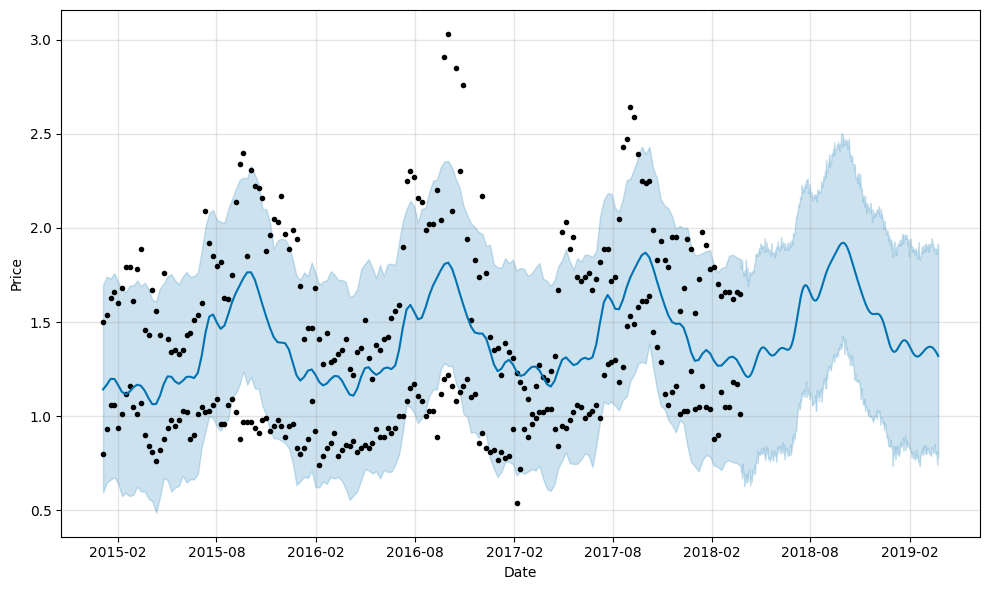

In [89]:
# graficamos predicciones
fig1 = m.plot(forecast, xlabel ='Date', ylabel = 'Price')

En este caso, parece que el precio del aguacate aumentará a partir de febrero de 2018, al contrario de lo que ocurre en la previsión a nivel de país.

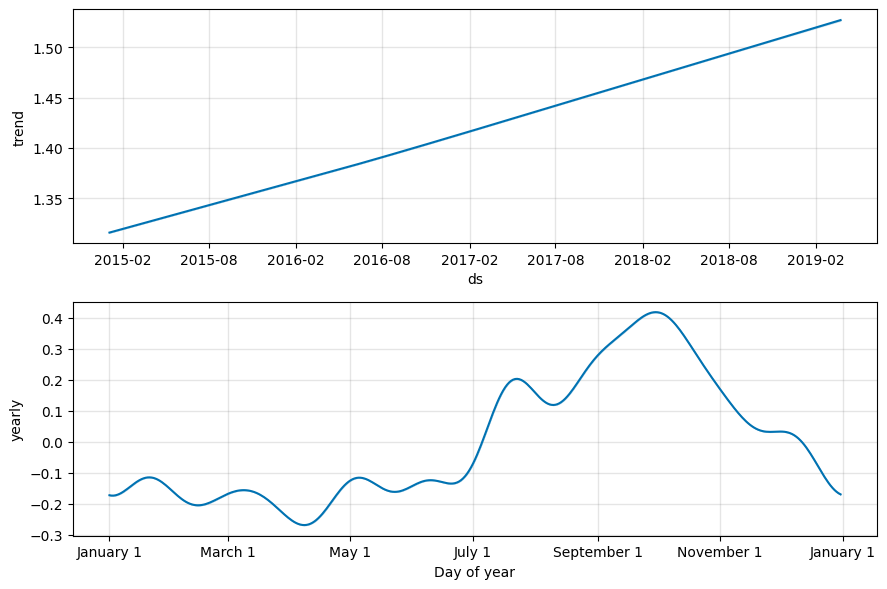

In [90]:
# graficamos componentes de la prediccion
fig2 = m.plot_components(forecast)

La tendencia, como podemos observar, se incrementa a lo largo del tiempo.

La estacionalidad es similar a la y a nivel de país, ya que alcanza un pico en el mes de octubre.